In [2]:
%load_ext autoreload
%autoreload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy import stats

from MLP.mlp_regression import mlp_regression, model_validation, mlp_prediction, mlp_prediction_error, mlp_train_graph, errorDist, mlp_train_multi_graph, mlp_train_multi_graph_comb, mlp_train_multi_3dgraph_comb
from MLP.utils import data_loader_pathloss, describeData, data_loader_pathloss_with_freq

pd.set_option('display.max_rows', 999)
pd.set_option('precision', 5)

In [3]:
%autoreload
X_train_bh_34, y_train_bh_34, X_val_bh_34, y_val_bh_34, X_test_bh_34, y_test_bh_34 = data_loader_pathloss_with_freq('data/PLdata_bh_34.mat',np.log10(3400))
X_train_bh_53, y_train_bh_53, X_val_bh_53, y_val_bh_53, X_test_bh_53, y_test_bh_53 = data_loader_pathloss_with_freq('data/PLdata_bh_53.mat',np.log10(5300))
X_train_bh_64, y_train_bh_64, X_val_bh_64, y_val_bh_64, X_test_bh_64, y_test_bh_64 = data_loader_pathloss_with_freq('data/PLdata_bh_64.mat',np.log10(6400))

X_train_bh = np.concatenate((X_train_bh_34, X_train_bh_53), axis=0)
y_train_bh = np.concatenate((y_train_bh_34, y_train_bh_53),axis=0)
X_train_bh = np.concatenate((X_train_bh, X_train_bh_64), axis=0)
y_train_bh = np.concatenate((y_train_bh, y_train_bh_64),axis=0)

df_train_bh = pd.DataFrame({'X_train1':X_train_bh[:,0],'X_train2':X_train_bh[:,1], 'y_train':y_train_bh}).sort_values(by=['X_train1'])
X_train_bh = np.concatenate((np.array(df_train_bh['X_train1']).reshape(-1,1),np.array(df_train_bh['X_train2']).reshape(-1,1)),axis=1)
y_train_bh = np.array(df_train_bh['y_train'])

X_val_bh = np.concatenate((X_val_bh_34, X_val_bh_53), axis=0)
y_val_bh = np.concatenate((y_val_bh_34, y_val_bh_53),axis=0)
X_val_bh = np.concatenate((X_val_bh, X_val_bh_64), axis=0)
y_val_bh = np.concatenate((y_val_bh, y_val_bh_64),axis=0)
df_val_bh = pd.DataFrame({'X_val1':X_val_bh[:,0],'X_val2':X_val_bh[:,1], 'y_val':y_val_bh}).sort_values(by=['X_val1'])
X_val_bh = np.concatenate((np.array(df_val_bh['X_val1']).reshape(-1,1),np.array(df_val_bh['X_val2']).reshape(-1,1)),axis=1)
y_val_bh = np.array(df_val_bh['y_val'])

X_test_bh = np.concatenate((X_test_bh_34, X_test_bh_53), axis=0)
y_test_bh = np.concatenate((y_test_bh_34, y_test_bh_53),axis=0)
X_test_bh = np.concatenate((X_test_bh, X_test_bh_64), axis=0)
y_test_bh = np.concatenate((y_test_bh, y_test_bh_64),axis=0)
df_test_bh = pd.DataFrame({'X_test1':X_test_bh[:,0],'X_test2':X_test_bh[:,1], 'y_test':y_test_bh}).sort_values(by=['X_test1'])
X_test_bh = np.concatenate((np.array(df_test_bh['X_test1']).reshape(-1,1),np.array(df_test_bh['X_test2']).reshape(-1,1)),axis=1)
y_test_bh = np.array(df_test_bh['y_test'])

X_train_ma_34, y_train_ma_34, X_val_ma_34, y_val_ma_34, X_test_ma_34, y_test_ma_34 = data_loader_pathloss_with_freq('data/PLdata_ma_34.mat',np.log10(3400))
X_train_ma_53, y_train_ma_53, X_val_ma_53, y_val_ma_53, X_test_ma_53, y_test_ma_53 = data_loader_pathloss_with_freq('data/PLdata_ma_53.mat',np.log10(5300))
X_train_ma_64, y_train_ma_64, X_val_ma_64, y_val_ma_64, X_test_ma_64, y_test_ma_64 = data_loader_pathloss_with_freq('data/PLdata_ma_64.mat',np.log10(6400))

X_train_ma = np.concatenate((X_train_ma_34, X_train_ma_53), axis=0)
y_train_ma = np.concatenate((y_train_ma_34, y_train_ma_53),axis=0)
X_train_ma = np.concatenate((X_train_ma, X_train_ma_64), axis=0)
y_train_ma = np.concatenate((y_train_ma, y_train_ma_64),axis=0)
df_train_ma = pd.DataFrame({'X_train1':X_train_ma[:,0],'X_train2':X_train_ma[:,1], 'y_train':y_train_ma}).sort_values(by=['X_train1'])
X_train_ma = np.concatenate((np.array(df_train_ma['X_train1']).reshape(-1,1),np.array(df_train_ma['X_train2']).reshape(-1,1)),axis=1)
y_train_ma = np.array(df_train_ma['y_train'])

X_val_ma = np.concatenate((X_val_ma_34, X_val_ma_53), axis=0)
y_val_ma = np.concatenate((y_val_ma_34, y_val_ma_53),axis=0)
X_val_ma = np.concatenate((X_val_ma, X_val_ma_64), axis=0)
y_val_ma = np.concatenate((y_val_ma, y_val_ma_64),axis=0)
df_val_ma = pd.DataFrame({'X_val1':X_val_ma[:,0],'X_val2':X_val_ma[:,1], 'y_val':y_val_ma}).sort_values(by=['X_val1'])
X_val_ma = np.concatenate((np.array(df_val_ma['X_val1']).reshape(-1,1),np.array(df_val_ma['X_val2']).reshape(-1,1)),axis=1)
y_val_ma = np.array(df_val_ma['y_val'])

X_test_ma = np.concatenate((X_test_ma_34, X_test_ma_53), axis=0)
y_test_ma = np.concatenate((y_test_ma_34, y_test_ma_53),axis=0)
X_test_ma = np.concatenate((X_test_ma, X_test_ma_64), axis=0)
y_test_ma = np.concatenate((y_test_ma, y_test_ma_64),axis=0)
df_test_ma = pd.DataFrame({'X_test1':X_test_ma[:,0],'X_test2':X_test_ma[:,1], 'y_test':y_test_ma}).sort_values(by=['X_test1'])
X_test_ma = np.concatenate((np.array(df_test_ma['X_test1']).reshape(-1,1),np.array(df_test_ma['X_test2']).reshape(-1,1)),axis=1)
y_test_ma = np.array(df_test_ma['y_test'])


#hidden_layer: (30,) / hidden_units:30 / RMSE:7.60156919779611
#hidden_layer: (30, 30) / hidden_units:30 / RMSE:7.601572341622246
#hidden_layer: (30, 30, 30) / hidden_units:30 / RMSE:7.595536872605158
#hidden_layer: (30, 30, 30, 30) / hidden_units:30 / RMSE:7.582134398741653
#hidden_layer: (30, 30, 30, 30, 30) / hidden_units:30 / RMSE:7.582674128860838
#hidden_layer: (30, 30, 30, 30, 30, 30) / hidden_units:30 / RMSE:7.442526175403231
#hidden_layer: (30, 30, 30, 30, 30, 30, 30) / hidden_units:30 / RMSE:7.601523849046574
#hidden_layer: (30, 30, 30, 30, 30, 30, 30, 30) / hidden_units:30 / RMSE:7.601623107084591
#hidden_layer: (30, 30, 30, 30, 30, 30, 30, 30, 30) / hidden_units:30 / RMSE:7.423970224167289
#hidden_layer: (30, 30, 30, 30, 30, 30, 30, 30, 30, 30) / hidden_units:30 / RMSE:7.435773064797212
#hidden_layer: (30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30) / hidden_units:30 / RMSE:7.415462881784643
#hidden_layer: (30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30) / hidden_units:30 / RMS

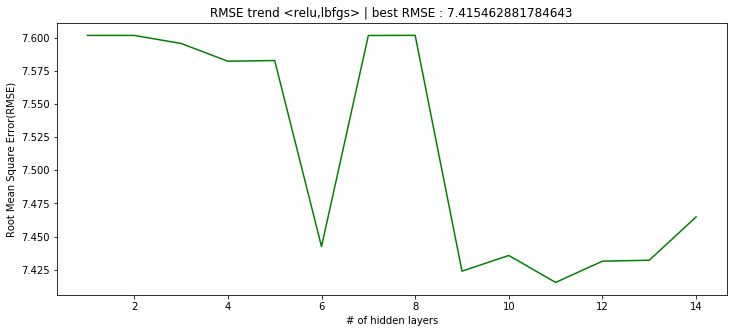

MLPRegressor(activation='relu', alpha=0.0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30),
       learning_rate='constant', learning_rate_init=0.001, max_iter=2000,
       momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
       power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
       tol=0.01, validation_fraction=0.1, verbose=False, warm_start=False)


In [57]:
%autoreload
# model_validation(Xtrain, Ytrain, mode, max_layers, max_unit, activation, loss)
model = model_validation(X_train_bh, y_train_bh, X_val_bh, y_val_bh, 'hl', 15, 30, 'relu', 'lbfgs')
print(model)
# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_val_bh, y_val_bh)

#hidden_layer: (60,) / hidden_units:60 / RMSE:7.458505116889918
#hidden_layer: (60, 60) / hidden_units:60 / RMSE:7.430081941701165
#hidden_layer: (60, 60, 60) / hidden_units:60 / RMSE:7.4341972172191735
#hidden_layer: (60, 60, 60, 60) / hidden_units:60 / RMSE:7.424068526176382
#hidden_layer: (60, 60, 60, 60, 60) / hidden_units:60 / RMSE:7.438706909333342
#hidden_layer: (60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:10.521499821640193
#hidden_layer: (60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:10.52149775067497
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:10.521497421080554
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:10.521497430269765
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:10.521497426699602
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:10.52149742517162
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60

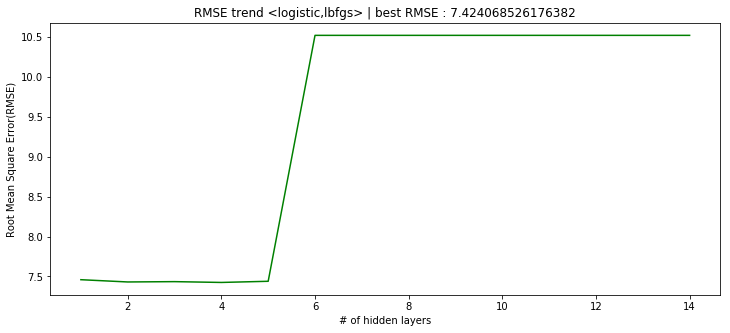

In [7]:
%autoreload

# model_validation(Xtrain, Ytrain, mode, max_layers, max_unit, activation, loss)
model = model_validation(X_train_bh, y_train_bh, X_val_bh, y_val_bh, 'hl', 15, 30, 'logistic', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_val_bh, y_val_bh)

#hidden_layer: (60,) / hidden_units:60 / RMSE:7.50073554847929
#hidden_layer: (60, 60) / hidden_units:60 / RMSE:7.5162058205247915
#hidden_layer: (60, 60, 60) / hidden_units:60 / RMSE:7.509082418503
#hidden_layer: (60, 60, 60, 60) / hidden_units:60 / RMSE:7.5811477616267275
#hidden_layer: (60, 60, 60, 60, 60) / hidden_units:60 / RMSE:10.521501084468667
#hidden_layer: (60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:7.485350328566901
#hidden_layer: (60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:10.52149128882512
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:7.420754853921438
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:7.452292978240151
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:10.521497477489289
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:10.52149751706415
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RM

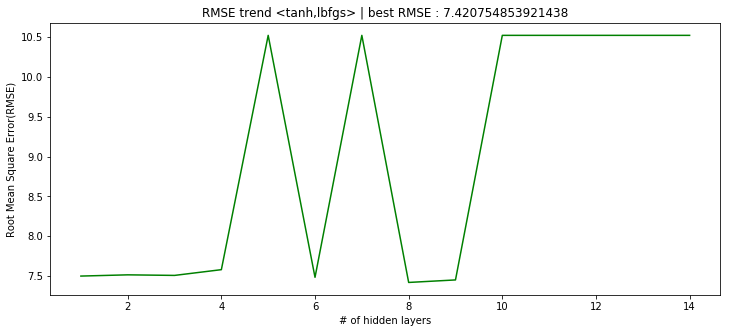

In [9]:
%autoreload

# model_validation(Xtrain, Ytrain, mode, max_layers, max_unit, activation, loss)
model = model_validation(X_train_bh, y_train_bh, X_val_bh, y_val_bh, 'hl', 15, 30, 'tanh', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_val_bh, y_val_bh)

1      10.510068915919282
2      7.267170409837239
3      7.267170409835555
4      7.261502887688416
5      7.267170409836178
6      7.267170409835555
7      7.25511106909573
8      7.247969258656103
9      7.267170409835693
10      7.246431204744466
11      7.267170409837825
12      7.267170409835568
13      7.267170409835751
14      7.267170409835556
15      7.267170409836848
16      7.2671698506941205
17      7.267170409835609
18      7.267170409835758
19      7.267170409837666
20      7.24412045152306
21      7.267170314173319
22      7.267170409918752
23      7.267170409849881
24      7.248305651147338
25      7.26717040985825
26      7.267170409844336
27      7.267170425226566
28      7.267170409954553
29      7.267170410252308
30      7.240726850323498
31      7.267161404454297
32      7.267170373835565
33      7.267170409835555
34      7.2671704098643515
35      7.238711821285165
36      7.267170409835644
37      7.26717040983901
38      7.267194974057671
39      7.266801608227

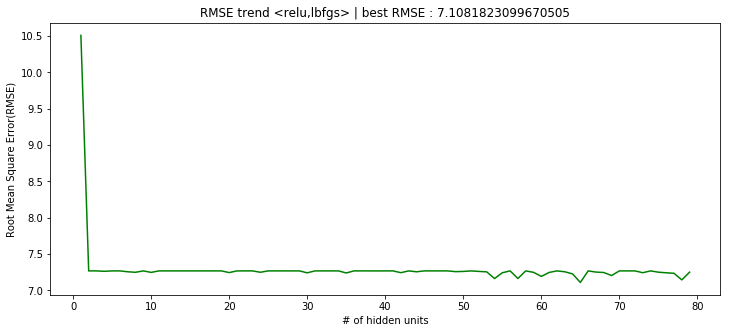

MLPRegressor(activation='relu', alpha=0.0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=390, learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=1e-06,
       validation_fraction=0.1, verbose=False, warm_start=False)


In [5]:
%autoreload
# model_validation(Xtrain, Ytrain, mode, max_layers, max_unit, activation, loss)
model = model_validation(X_train_bh, y_train_bh, X_val_bh, y_val_bh, 'hu', 6, 80, 'relu', 'lbfgs')
print(model)
# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_val_bh, y_val_bh)

1      10.511919726444454
2      10.511850984692849
3      10.511912156605291
4      10.512057438466353
5      10.511925516643494
6      10.512606388766715
7      7.593390495099384
8      7.593047546588354
9      7.5934439582761195
10      7.595315930276641
11      7.596211278008473
12      7.592111835278596
13      7.593646087537851
14      7.594138793008228
15      7.593372874237484
16      7.593692519826401
17      7.593959403503841
18      7.594124713749369
19      7.594343083914873
20      7.594047861646391
21      7.593335677016149
22      7.593207997207159
23      7.593696876217672
24      7.593280102634665
25      7.594552511665101
26      7.597608688119186
27      7.521052560027266
28      7.593295613463101
29      7.58968305473145
30      7.593920648864801
31      7.593263644798432
32      7.593641198785255
33      7.594259445621195
34      7.593474613459251
35      7.597831802797078
36      7.597341595930486
37      7.593383234156769
38      7.593416557257742
39      7.59759

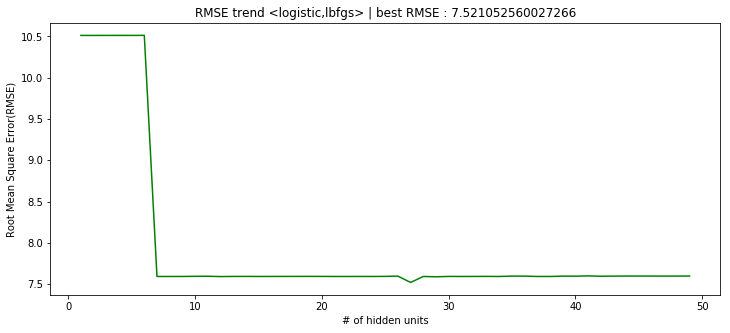

MLPRegressor(activation='logistic', alpha=0.0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=27, learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.01,
       validation_fraction=0.1, verbose=False, warm_start=False)


In [53]:
%autoreload
# model_validation(Xtrain, Ytrain, mode, max_layers, max_unit, activation, loss)
model = model_validation(X_train_bh, y_train_bh, X_val_bh, y_val_bh, 'hu', 1, 50, 'logistic', 'lbfgs')
print(model)
# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_val_bh, y_val_bh)

1      10.51191972636077
2      10.511919728328541
3      10.511919726422969
4      10.51191243933589
5      10.511919724224732
6      10.511806483289066
7      10.511895647538616
8      10.511918634133346
9      7.593492146703688
10      7.593331115964918
11      7.593349661140322
12      7.593336449694387
13      7.59333537435742
14      7.593652918484917
15      7.59374740159082
16      7.593335628103515
17      7.593360102529655
18      7.5933373772026584
19      7.593384069491126
20      7.593650724538478
21      7.593995633002974
22      7.593079797242874
23      7.589410377215023
24      7.593532622288041
25      7.59364140375337
26      7.593124816866611
27      7.593390964670113
28      7.5933374884076645
29      7.59420377133013
30      7.593475238223984
31      7.592982009114148
32      7.593979299564138
33      7.593156990638697
34      7.593878586111066
35      7.594084123151046
36      7.593370767454289
37      7.594039196716516
38      7.593329213827848
39      7.5946221

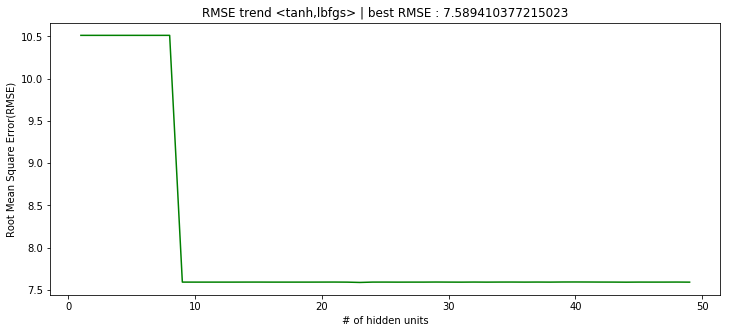

MLPRegressor(activation='tanh', alpha=0.0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=23, learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.01,
       validation_fraction=0.1, verbose=False, warm_start=False)


In [56]:
%autoreload
# model_validation(Xtrain, Ytrain, mode, max_layers, max_unit, activation, loss)
model = model_validation(X_train_bh, y_train_bh, X_val_bh, y_val_bh, 'hu', 1, 50, 'tanh', 'lbfgs')
print(model)
# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_val_bh, y_val_bh)

#hidden_layer: (60,) / hidden_units:60 / RMSE:7.610192853265879
#hidden_layer: (60, 60) / hidden_units:60 / RMSE:7.6101922181820605
#hidden_layer: (60, 60, 60) / hidden_units:60 / RMSE:7.129364495553785
#hidden_layer: (60, 60, 60, 60) / hidden_units:60 / RMSE:6.715309430854588
#hidden_layer: (60, 60, 60, 60, 60) / hidden_units:60 / RMSE:6.800623790726743
#hidden_layer: (60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:6.80002221195186
#hidden_layer: (60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:6.681467875946852
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:6.762942418793309
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:6.716807171039859
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:6.794909042670467
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:6.606472535270326
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RM

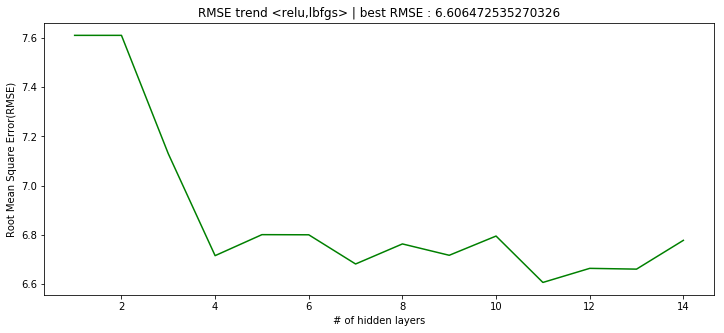

MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60),
       learning_rate='constant', learning_rate_init=0.001, max_iter=1000,
       momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
       power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
       tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


In [12]:
%autoreload
# model_validation(Xtrain, Ytrain, mode, max_layers, max_unit, activation, loss)
model = model_validation(X_train_ma, y_train_ma, X_val_ma, y_val_ma, 'hl', 15, 30, 'relu', 'lbfgs')
print(model)
# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_val_ma, y_val_ma)

#hidden_layer: (60,) / hidden_units:60 / RMSE:6.7417948170996125
#hidden_layer: (60, 60) / hidden_units:60 / RMSE:6.6777304250626655
#hidden_layer: (60, 60, 60) / hidden_units:60 / RMSE:6.74042892134631
#hidden_layer: (60, 60, 60, 60) / hidden_units:60 / RMSE:6.767063211690856
#hidden_layer: (60, 60, 60, 60, 60) / hidden_units:60 / RMSE:6.591386929027339
#hidden_layer: (60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:7.026710693741468
#hidden_layer: (60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:14.495256961745419
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:14.495257341716718
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:14.495257477569544
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:14.49525747936082
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:14.495257482759643
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60

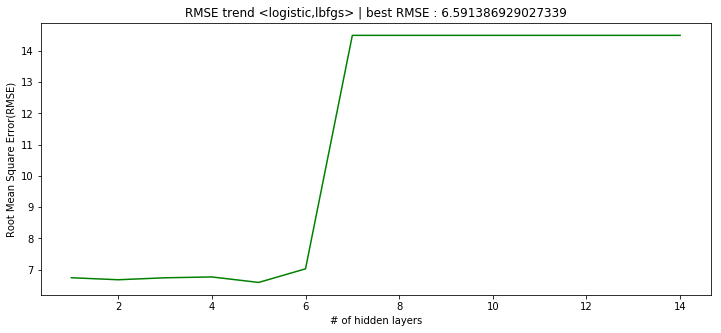

MLPRegressor(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(60, 60, 60, 60, 60), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


In [13]:
%autoreload
# model_validation(Xtrain, Ytrain, mode, max_layers, max_unit, activation, loss)
model = model_validation(X_train_ma, y_train_ma, X_val_ma, y_val_ma, 'hl', 15, 30, 'logistic', 'lbfgs')
print(model)
# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_val_ma, y_val_ma)

#hidden_layer: (60,) / hidden_units:60 / RMSE:6.867434149408198
#hidden_layer: (60, 60) / hidden_units:60 / RMSE:6.746918896278818
#hidden_layer: (60, 60, 60) / hidden_units:60 / RMSE:6.907283227131017
#hidden_layer: (60, 60, 60, 60) / hidden_units:60 / RMSE:6.859296122710055
#hidden_layer: (60, 60, 60, 60, 60) / hidden_units:60 / RMSE:6.691769760500054
#hidden_layer: (60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:6.930738128410892
#hidden_layer: (60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:6.842411025275933
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:14.495256656222299
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:14.495258151724844
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:14.495257427091461
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:14.495259257728955
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 

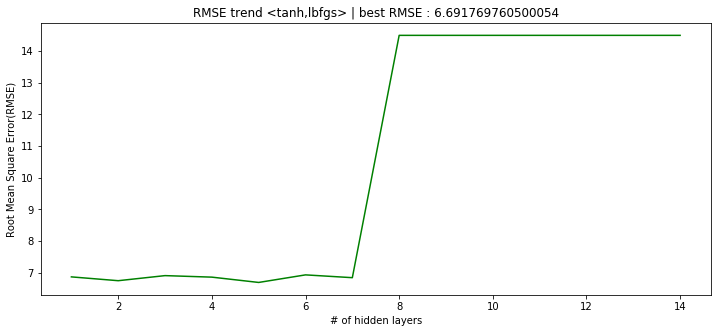

MLPRegressor(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(60, 60, 60, 60, 60), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


In [14]:
%autoreload
# model_validation(Xtrain, Ytrain, mode, max_layers, max_unit, activation, loss)
model = model_validation(X_train_ma, y_train_ma, X_val_ma, y_val_ma, 'hl', 15, 30, 'tanh', 'lbfgs')
print(model)
# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_val_ma, y_val_ma)

1      14.49525748310633
2      14.49525748310633
3      14.49525748310633
4      14.49525748310633
5      7.610192550077641
6      7.610192654752293
7      7.610191050090295
8      7.610197718058382
9      7.610195132140757
10      7.61019402997315
11      7.610192749677176
12      7.610191080636982
13      7.61019321848314
14      7.610191196830452
15      7.610192824350622
16      7.610194036252163
17      7.610192921807499
18      7.610193284564376
19      7.6101911534706845
20      7.610192894153686
21      7.6101932941077886
22      7.610195120726397
23      7.610194290823121
24      7.610191270837706
25      7.6101925169471665
26      7.61019195336718
27      7.610193090923065
28      7.61019253172018
29      7.6101933738974505
30      7.610191927457834
31      7.61019156012026
32      7.610192337571417
33      7.610191837237818
34      7.610191534853396
35      7.610194120385137
36      7.610192120684656
37      7.610192509364296
38      7.610192575145798
39      7.610192496668

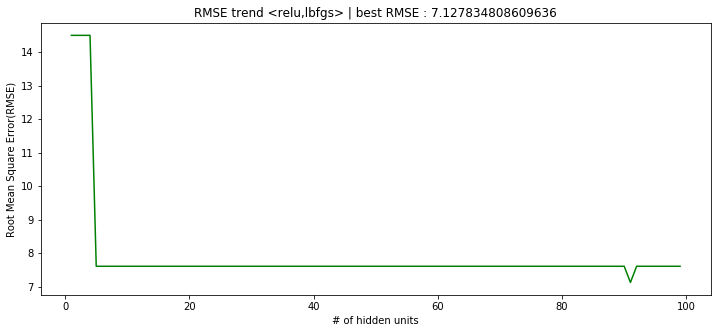

MLPRegressor(activation='relu', alpha=0.0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=91, learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.01,
       validation_fraction=0.1, verbose=False, warm_start=False)


In [46]:
%autoreload
# model_validation(Xtrain, Ytrain, mode, max_layers, max_unit, activation, loss)
model = model_validation(X_train_ma, y_train_ma, X_val_ma, y_val_ma, 'hu', 1, 50, 'relu', 'lbfgs')
print(model)
# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_val_ma, y_val_ma)

1      14.495257484726627
2      14.495255595958302
3      14.495349530714783
4      14.495004961366728
5      7.297979504100945
6      6.884024575342545
7      14.495233836394597
8      14.495652165608655
9      6.862280309567417
10      6.883832708422954
11      6.855596304744097
12      6.884913739075732
13      6.873890296740916
14      6.859477172854132
15      6.872337663457806
16      6.871023408289257
17      6.8780527593345475
18      14.495486354164541
19      6.884299744307466
20      6.856844170374623
21      7.28185755570919
22      6.810284418627033
23      6.898265644886444
24      6.870021756771979
25      6.840858383473277
26      6.873227188287305
27      6.853850982165529
28      6.857239484638305
29      6.873909214982989
30      6.872324547715519
31      6.857766646160143
32      6.866437726968871
33      6.760673745148831
34      6.860402943329795
35      6.84237878509466
36      6.789138223742671
37      6.875465500953215
38      6.8609673188270595
39      6.8729

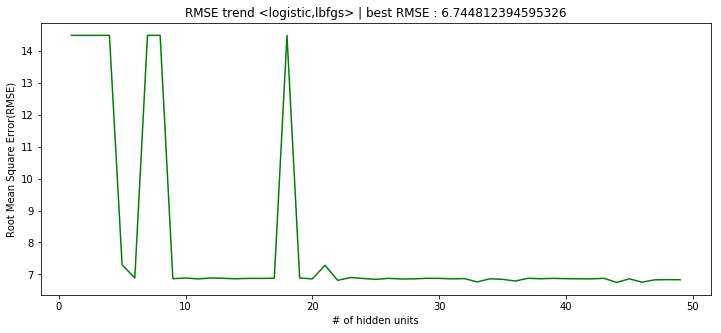

MLPRegressor(activation='logistic', alpha=0.0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=44, learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.01,
       validation_fraction=0.1, verbose=False, warm_start=False)


In [48]:
%autoreload
# model_validation(Xtrain, Ytrain, mode, max_layers, max_unit, activation, loss)
model = model_validation(X_train_ma, y_train_ma, X_val_ma, y_val_ma, 'hu', 1, 50, 'logistic', 'lbfgs')
print(model)
# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_val_ma, y_val_ma)

1      14.49525748310633
2      14.495257456003657
3      6.88403489243307
4      14.495257367627566
5      14.495257482538033
6      7.194404939425991
7      7.2934565595087735
8      6.884012897063004
9      7.185742995000248
10      6.8840198440932845
11      7.292126797336949
12      7.291563602449674
13      6.8840220242006245
14      6.884024034371241
15      6.883940581140519
16      6.878749716708423
17      6.883754862554179
18      6.8840393847132555
19      7.146708759408003
20      7.293269905072666
21      7.293453047734715
22      6.883782487500296
23      6.88136530077673
24      6.883854674466867
25      6.883985049437919
26      6.883888685069729
27      6.883457180117171
28      6.884037884332007
29      6.856830819999034
30      6.872120893002103
31      6.884002083285417
32      6.869626505680327
33      6.883556296940866
34      6.872894847082021
35      6.883999982155113
36      6.772327285413342
37      6.875074567060805
38      6.869933048989265
39      6.868015

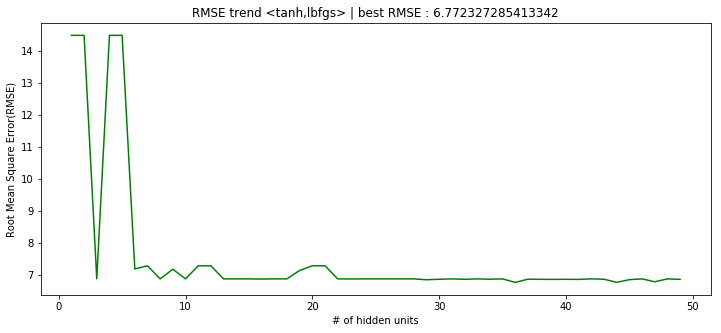

MLPRegressor(activation='tanh', alpha=0.0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=36, learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.01,
       validation_fraction=0.1, verbose=False, warm_start=False)


In [49]:
%autoreload
# model_validation(Xtrain, Ytrain, mode, max_layers, max_unit, activation, loss)
model = model_validation(X_train_ma, y_train_ma, X_val_ma, y_val_ma, 'hu', 1, 50, 'tanh', 'lbfgs')
print(model)
# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_val_ma, y_val_ma)